Análise de mudanças climáticas do Azure Notebook

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()


Importar Dados

In [9]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv',delimiter=',', usecols=(0,1),unpack=True)
years,mean= np.loadtxt('5-year-mean-1882-2014.csv',delimiter=',', usecols=(0,1), unpack=True)

Criar gráfico de dispersão

( x = yearsBase, y= Mean)


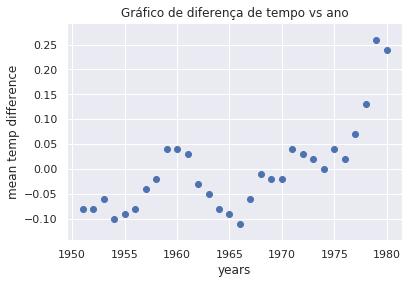

In [10]:
plt.scatter(yearsBase,meanBase) 
plt.title("Gráfico de diferença de tempo vs ano")
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

Executar Regresssão linear

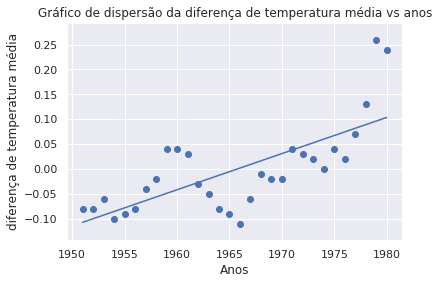

 y = 0.007279199110122221 * x + -14.309265850945222


In [12]:
m,b = np.polyfit(yearsBase, meanBase,1)


#como o y só depende do valor de x, uma função de primeiro grau indica o y
#como só temos o x, o np.polyfit(x,y,1) retorna os valor que multiplicado e somado ao x chegaremos ao y
def f(x):
    y = m*x + b
    return y
    
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('Gráfico de dispersão da diferença de temperatura média vs anos')
plt.xlabel('Anos', fontsize=12)
plt.ylabel('diferença de temperatura média', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(m, b))



Executando regressão linear com o Scikit-Learn

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


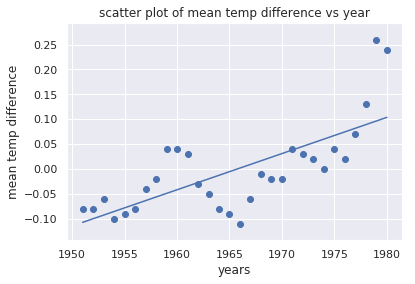

 y = 0.007279199110122357 * x + -14.309265850945492


In [21]:
model = LinearRegression(fit_intercept=True)

# Ajustando e construindo o modelo de regressão 
model.fit(yearsBase[:, np.newaxis], meanBase) 
mean_predicted = model.predict(yearsBase[:, np.newaxis])


#Plotagem do gráfico
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))